### ETH & BTC Combined EDA

#### Step 1: Load BTC & ETH Data
First, let's load the two datasets and inspect them.

In [1]:
import pandas as pd

# Load BTC dataset
btc_file_path = "/Users/halladaykinsey/Desktop/btcusd_1-min_data.csv"
btc_df = pd.read_csv(btc_file_path)
btc_df["Asset"] = "BTC"

# Load ETH dataset
eth_file_path = "/Users/halladaykinsey/Desktop/ETH_1min.csv"
eth_df = pd.read_csv(eth_file_path)
eth_df["Asset"] = "ETH"

print("BTC Data Sample:")
print(btc_df.head())

print("\nETH Data Sample:")
print(eth_df.head())

BTC Data Sample:
      Timestamp  Open  High   Low  Close  Volume Asset
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0   BTC

ETH Data Sample:
   Unix Timestamp                 Date  Symbol    Open    High     Low  \
0   1586995200000  2020-04-16 00:00:00  ETHUSD  152.94  152.94  151.33   
1   1586995140000  2020-04-15 23:59:00  ETHUSD  152.94  152.94  152.94   
2   1586995080000  2020-04-15 23:58:00  ETHUSD  153.17  153.17  152.94   
3   1586995020000  2020-04-15 23:57:00  ETHUSD  152.96  153.20  152.96   
4   1586994960000  2020-04-15 23:56:00  ETHUSD  153.14  153.14  152.96   

    Close      Volume Asset  
0  151.33  112.724931   ETH  
1  152.94    0.000000   ETH  
2  152.94    0.013011   ETH  
3  153.17  466.782278   ETH  
4  152.96  167.930714   ETH  


In [2]:
# Standardizing column names
btc_df.rename(columns={"Timestamp": "Unix Timestamp"}, inplace=True)
eth_df.rename(columns={"Date": "Datetime"}, inplace=True)

# Convert UNIX timestamp to a proper datetime format
btc_df["Datetime"] = pd.to_datetime(btc_df["Unix Timestamp"], unit="s")
eth_df["Datetime"] = pd.to_datetime(eth_df["Datetime"])

# Drop redundant timestamp columns
btc_df.drop(columns=["Unix Timestamp"], inplace=True)
eth_df.drop(columns=["Unix Timestamp"], inplace=True)

# Ensure numerical consistency
btc_df = btc_df[['Datetime', 'Asset', 'Open', 'High', 'Low', 'Close', 'Volume']]
eth_df = eth_df[['Datetime', 'Asset', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [3]:
# Checking date ranges
print(f"BTC Date Range: {btc_df['Datetime'].min()} to {btc_df['Datetime'].max()}")
print(f"ETH Date Range: {eth_df['Datetime'].min()} to {eth_df['Datetime'].max()}")

BTC Date Range: 2012-01-01 10:01:00 to 2025-03-09 00:00:00
ETH Date Range: 2016-05-09 13:32:00 to 2020-04-16 00:00:00


In [4]:
# Finding overlapping time range
start_date = eth_df["Datetime"].min()
end_date = eth_df["Datetime"].max()

# Trimming BTC
btc_df = btc_df[(btc_df["Datetime"] >= start_date) & (btc_df["Datetime"] <= end_date)]

In [5]:
# Resample to 1-min intervals
btc_df.set_index("Datetime", inplace=True)
eth_df.set_index("Datetime", inplace=True)

btc_df = btc_df.resample("1T").ffill()
eth_df = eth_df.resample("1T").ffill()

btc_df.reset_index(inplace=True)
eth_df.reset_index(inplace=True)

/var/folders/8j/8zxjcfw125g4mfl6xvm5bl080000gn/T/ipykernel_31595/726247793.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  btc_df = btc_df.resample("1T").ffill()
/var/folders/8j/8zxjcfw125g4mfl6xvm5bl080000gn/T/ipykernel_31595/726247793.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  eth_df = eth_df.resample("1T").ffill()


In [6]:
# Merging on Datetime
combined_df = pd.merge(btc_df, eth_df, on="Datetime", suffixes=("_BTC", "_ETH"))

print(combined_df.info())
print(combined_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069909 entries, 0 to 2069908
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Datetime    datetime64[ns]
 1   Asset_BTC   object        
 2   Open_BTC    float64       
 3   High_BTC    float64       
 4   Low_BTC     float64       
 5   Close_BTC   float64       
 6   Volume_BTC  float64       
 7   Asset_ETH   object        
 8   Open_ETH    float64       
 9   High_ETH    float64       
 10  Low_ETH     float64       
 11  Close_ETH   float64       
 12  Volume_ETH  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 205.3+ MB
None
             Datetime Asset_BTC  Open_BTC  High_BTC  Low_BTC  Close_BTC  \
0 2016-05-09 13:32:00       BTC    457.00    457.00   457.00     457.00   
1 2016-05-09 13:33:00       BTC    457.00    457.00   457.00     457.00   
2 2016-05-09 13:34:00       BTC    457.00    457.00   457.00     457.00   
3 2016-05-09 13:35:00       

In [8]:
combined_df.to_csv("/Users/halladaykinsey/capstone-project/combined_crypto_data.csv", index=False)

#### Visualizing trends & price movement

In [9]:
print(combined_df.info())
print(combined_df.describe())
print(combined_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069909 entries, 0 to 2069908
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Datetime    datetime64[ns]
 1   Asset_BTC   object        
 2   Open_BTC    float64       
 3   High_BTC    float64       
 4   Low_BTC     float64       
 5   Close_BTC   float64       
 6   Volume_BTC  float64       
 7   Asset_ETH   object        
 8   Open_ETH    float64       
 9   High_ETH    float64       
 10  Low_ETH     float64       
 11  Close_ETH   float64       
 12  Volume_ETH  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 205.3+ MB
None
                            Datetime      Open_BTC      High_BTC  \
count                        2069909  2.069909e+06  2.069909e+06   
mean   2018-04-28 06:45:59.999995136  5.481630e+03  5.485532e+03   
min              2016-05-09 13:32:00  4.350000e+02  4.351300e+02   
25%              2017-05-03 22:09:00  1.484000e+03  1.48

1. CLOSE

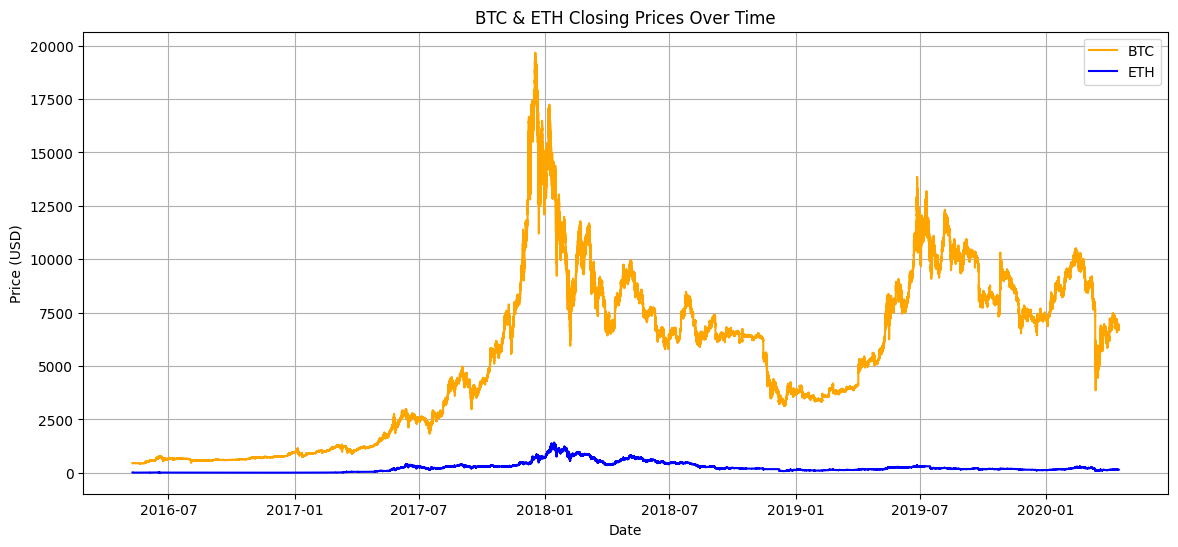

In [10]:
# Plotting close
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y="Close_BTC", label="BTC", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="Close_ETH", label="ETH", color="blue")
plt.title("BTC & ETH Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

2. CORRELATION

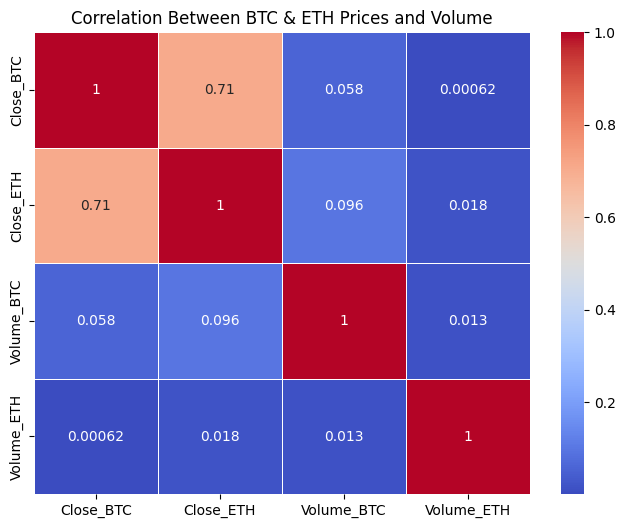

In [11]:
# Computing correlation matrix
correlation_matrix = combined_df[["Close_BTC", "Close_ETH", "Volume_BTC", "Volume_ETH"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between BTC & ETH Prices and Volume")
plt.show()

3. DAILY RETURNS

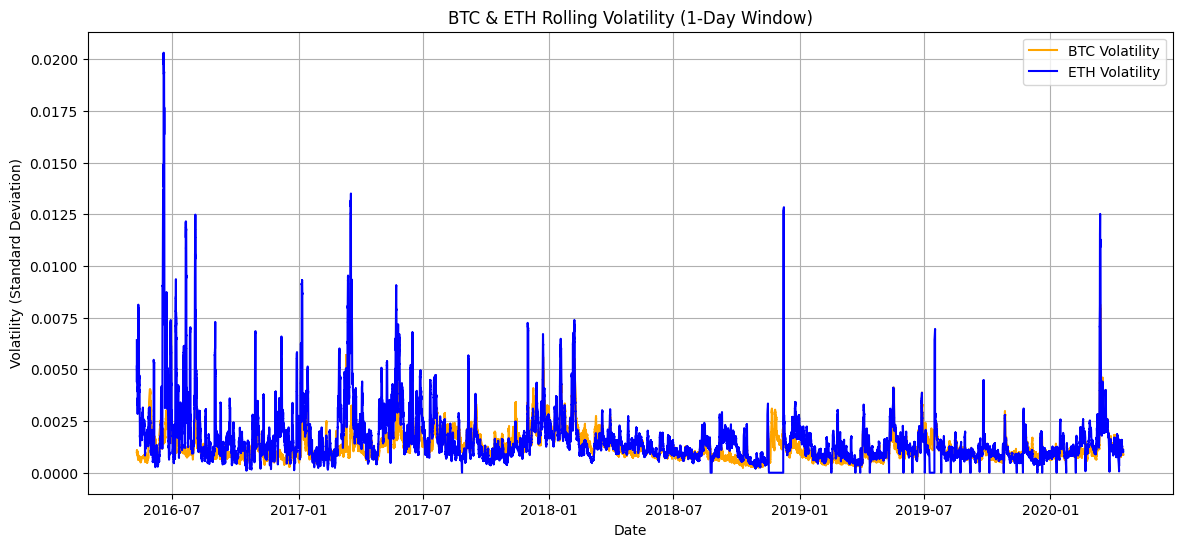

In [12]:
# Computing daily returns
combined_df["Return_BTC"] = combined_df["Close_BTC"].pct_change()
combined_df["Return_ETH"] = combined_df["Close_ETH"].pct_change()

# Rolling volatility (7-day window)
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y=combined_df["Return_BTC"].rolling(1440).std(), label="BTC Volatility", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y=combined_df["Return_ETH"].rolling(1440).std(), label="ETH Volatility", color="blue")
plt.title("BTC & ETH Rolling Volatility (1-Day Window)")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.grid(True)
plt.show()

4. 30 vs 100 vs 200 MOVING AVERAGES

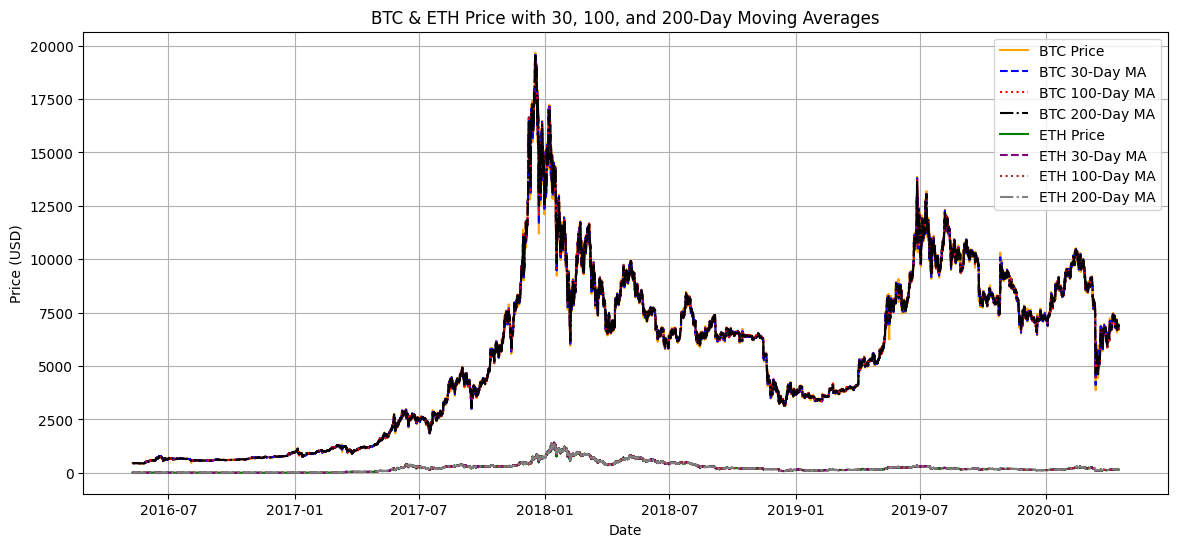

In [13]:
# Computing MAs
combined_df["MA30_BTC"] = combined_df["Close_BTC"].rolling(window=30).mean()
combined_df["MA100_BTC"] = combined_df["Close_BTC"].rolling(window=100).mean()
combined_df["MA200_BTC"] = combined_df["Close_BTC"].rolling(window=200).mean()

combined_df["MA30_ETH"] = combined_df["Close_ETH"].rolling(window=30).mean()
combined_df["MA100_ETH"] = combined_df["Close_ETH"].rolling(window=100).mean()
combined_df["MA200_ETH"] = combined_df["Close_ETH"].rolling(window=200).mean()

plt.figure(figsize=(14, 6))

# BTC
sns.lineplot(data=combined_df, x="Datetime", y="Close_BTC", label="BTC Price", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="MA30_BTC", label="BTC 30-Day MA", linestyle="dashed", color="blue")
sns.lineplot(data=combined_df, x="Datetime", y="MA100_BTC", label="BTC 100-Day MA", linestyle="dotted", color="red")
sns.lineplot(data=combined_df, x="Datetime", y="MA200_BTC", label="BTC 200-Day MA", linestyle="dashdot", color="black")

# ETH 
sns.lineplot(data=combined_df, x="Datetime", y="Close_ETH", label="ETH Price", color="green")
sns.lineplot(data=combined_df, x="Datetime", y="MA30_ETH", label="ETH 30-Day MA", linestyle="dashed", color="purple")
sns.lineplot(data=combined_df, x="Datetime", y="MA100_ETH", label="ETH 100-Day MA", linestyle="dotted", color="brown")
sns.lineplot(data=combined_df, x="Datetime", y="MA200_ETH", label="ETH 200-Day MA", linestyle="dashdot", color="gray")

plt.title("BTC & ETH Price with 30, 100, and 200-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Let's inspect this a little closer. 

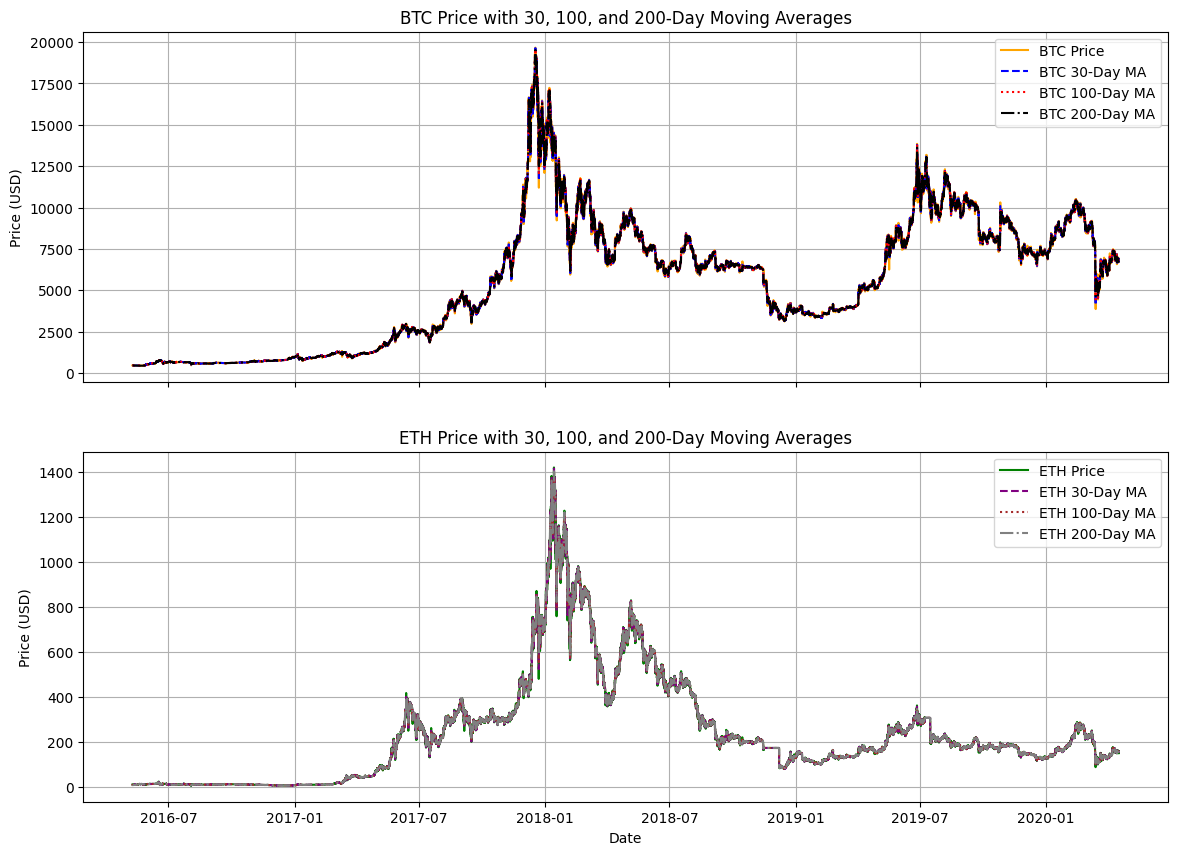

In [14]:
# Fig with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# BTC
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="Close_BTC", label="BTC Price", color="orange")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA30_BTC", label="BTC 30-Day MA", linestyle="dashed", color="blue")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA100_BTC", label="BTC 100-Day MA", linestyle="dotted", color="red")
sns.lineplot(ax=axes[0], data=combined_df, x="Datetime", y="MA200_BTC", label="BTC 200-Day MA", linestyle="dashdot", color="black")

axes[0].set_title("BTC Price with 30, 100, and 200-Day Moving Averages")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# ETH
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="Close_ETH", label="ETH Price", color="green")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA30_ETH", label="ETH 30-Day MA", linestyle="dashed", color="purple")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA100_ETH", label="ETH 100-Day MA", linestyle="dotted", color="brown")
sns.lineplot(ax=axes[1], data=combined_df, x="Datetime", y="MA200_ETH", label="ETH 200-Day MA", linestyle="dashdot", color="gray")

axes[1].set_title("ETH Price with 30, 100, and 200-Day Moving Averages")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

plt.show()

5. VOLUME ANALYSIS

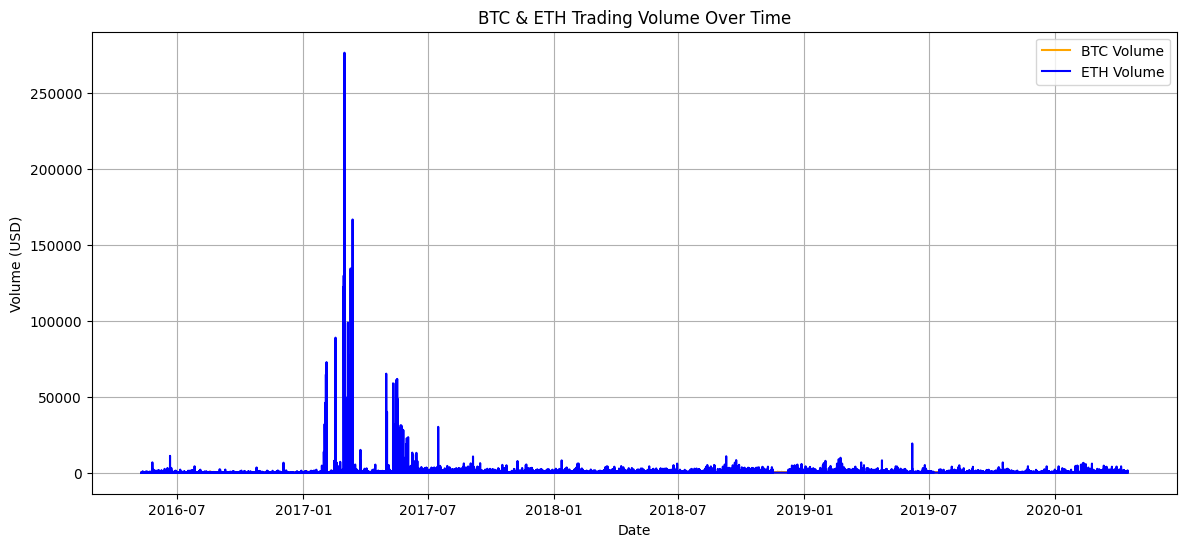

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x="Datetime", y="Volume_BTC", label="BTC Volume", color="orange")
sns.lineplot(data=combined_df, x="Datetime", y="Volume_ETH", label="ETH Volume", color="blue")
plt.title("BTC & ETH Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.legend()
plt.grid(True)
plt.show()

### Model Framework

#### Breakpoint to load in data from csv

In [1]:
import os
import pandas as pd

# Define file path
file_path = "/Users/halladaykinsey/capstone-project/combined_crypto_data.csv"

# Check if saved file exists
if os.path.exists(file_path):
    print("✅ Loading pre-saved dataset...")
    combined_df = pd.read_csv(file_path, parse_dates=["Datetime"])
else:
    print("⚠️ File not found. Merging raw BTC & ETH data...")
    combined_df = pd.merge(btc_df, eth_df, on="Datetime", suffixes=("_BTC", "_ETH"))
    combined_df.to_csv(file_path, index=False)  # Save for next time

# Confirm dataset loaded
print(f"Dataset Loaded: {combined_df.shape}")

✅ Loading pre-saved dataset...
Dataset Loaded: (2069909, 13)


In [2]:
# Selecting only relevant features
features = ["Open_BTC", "High_BTC", "Low_BTC", "Close_BTC", "Volume_BTC",
            "Open_ETH", "High_ETH", "Low_ETH", "Close_ETH", "Volume_ETH"]

target_column = "Close_BTC" 

# Filtering data
df = combined_df[["Datetime"] + features + [target_column]].copy()
df.set_index("Datetime", inplace=True) 
df.dropna(inplace=True) 
print(df.head())

                     Open_BTC  High_BTC  Low_BTC  Close_BTC  Volume_BTC  \
Datetime                                                                  
2016-05-09 13:32:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:33:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:34:00    457.00    457.00   457.00     457.00    0.000000   
2016-05-09 13:35:00    456.59    456.59   456.59     456.59    0.022236   
2016-05-09 13:36:00    456.59    456.59   456.59     456.59    0.000000   

                     Open_ETH  High_ETH  Low_ETH  Close_ETH  Volume_ETH  \
Datetime                                                                  
2016-05-09 13:32:00       0.0      12.0      0.0       12.0    4.156276   
2016-05-09 13:33:00      12.0      12.0     10.0       10.0   43.497506   
2016-05-09 13:34:00      10.0      10.0     10.0       10.0    8.000000   
2016-05-09 13:35:00      10.0      10.0     10.0       10.0   60.000000   
2016-05-09 13:36:00     

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit-transforming entire dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

print(df_scaled.head()) 

                     Open_BTC  High_BTC   Low_BTC  Close_BTC  Volume_BTC  \
Datetime                                                                   
2016-05-09 13:32:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:33:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:34:00  0.001144  0.001137  0.001145   0.001144    0.000000   
2016-05-09 13:35:00  0.001123  0.001116  0.001124   0.001123    0.000014   
2016-05-09 13:36:00  0.001123  0.001116  0.001124   0.001123    0.000000   

                     Open_ETH  High_ETH   Low_ETH  Close_ETH  Volume_ETH  \
Datetime                                                                   
2016-05-09 13:32:00  0.000000  0.004250  0.000000   0.004250    0.000015   
2016-05-09 13:33:00  0.008451  0.004250  0.007043   0.002836    0.000157   
2016-05-09 13:34:00  0.007042  0.002836  0.007043   0.002836    0.000029   
2016-05-09 13:35:00  0.007042  0.002836  0.007043   0.002836    0.000217   
2016-05-09 

In [4]:
# Reducing dataset size by taking every nth row 
sampling_factor = 10  # Keep 10% of the dataset #CHANGE DF SIZE HERE
df_sampled = df_scaled.iloc[::sampling_factor].copy()

print(f"Original dataset shape: {df_scaled.shape}")
print(f"Sampled dataset shape: {df_sampled.shape}")

Original dataset shape: (2069909, 11)
Sampled dataset shape: (206991, 11)


#### CNN

In [5]:
import numpy as np

def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Creating sequences
time_steps = 30  # Using past 30 minutes to predict the next close price
X, y = create_sequences(df_sampled, target_column="Close_BTC", time_steps=time_steps)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (82772, 30, 11)
Testing data shape: (20694, 30, 11)


In [6]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten
from keras.optimizers import Adam

model = Sequential()

# 1st Conv1D Layer
model.add(Conv1D(filters=8, kernel_size=3, strides=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

# 2nd Conv1D Layer
model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
model.add(Dropout(0.3))

# Flatten dense output
model.add(Flatten())

# Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compiling
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 8)          │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 26, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        13,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,049 (54.88 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

# Save model checkpoints
checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5", monitor='val_loss', save_best_only=True, verbose=1)

# Log training history
csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/cnn_btcpred_combined_log.csv")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

Epoch 1/50
5161/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 1: val_loss improved from inf to 0.01995, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0049 - val_loss: 0.0200
Epoch 2/50
5169/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0026
Epoch 2: val_loss improved from 0.01995 to 0.00574, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0057
Epoch 3/50
5163/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0026
Epoch 3: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0152
Epoch 4/50
5163/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 4: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0114
Epoch 5/50
5164/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 5: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0110
Epoch 6/50
5142/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 6: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0192
Epoch 7/50
5165/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 7: val_loss did not improve from 0.00574
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 15/50
5123/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0026
Epoch 15: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 16/50
5138/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 16: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0088
Epoch 17/50
5155/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 17: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0102
Epoch 18/50
5161/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0025
Epoch 18: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 19/50
5160/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0024
Epoch 19: val_loss did not improve from 0.00345
5174/5174 ━━━━━━━━━

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 25/50
5128/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0025
Epoch 25: val_loss improved from 0.00338 to 0.00304, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 26/50
5142/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 26: val_loss did not improve from 0.00304
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0053
Epoch 27/50
5160/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 27: val_loss improved from 0.00304 to 0.00164, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/cnn_btcpred_combined_model.h5


5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 28/50
5130/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 28: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 29/50
5170/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 29: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 30/50
5134/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 30: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 31/50
5141/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 31: val_loss did not improve from 0.00164
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 32/50
5173/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 32: val_loss improved from 0.00164 to 0.00145, saving model to /Use

5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 33/50
5137/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 33: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 34/50
5135/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 34: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0024 - val_loss: 0.0121
Epoch 35/50
5144/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 35: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 36/50
5140/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 36: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 37/50
5151/5174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 37: val_loss did not improve from 0.00145
5174/5174 ━━━━━━━━━━━━━━━

#### Breakpoint to define evaluation visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_performance(history, y_test, y_pred, model_name="Model"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training & Validation Loss
    axes[0].plot(history.history['loss'], label="Training Loss", color="blue")
    axes[0].plot(history.history['val_loss'], label="Validation Loss", color="red")
    axes[0].set_title(f"{model_name} - Training & Validation Loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss (MSE)")
    axes[0].legend()
    axes[0].grid(True)

    # Actual vs. Predicted Prices
    axes[1].plot(y_test[:200], label="Actual Prices", color="blue")
    axes[1].plot(y_pred[:200], label="Predicted Prices", linestyle="dashed", color="red")
    axes[1].set_title(f"{model_name} - Actual vs. Predicted Prices")
    axes[1].set_xlabel("Time Steps")
    axes[1].set_ylabel("Price (Scaled)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

Evaluating CNN

647/647 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


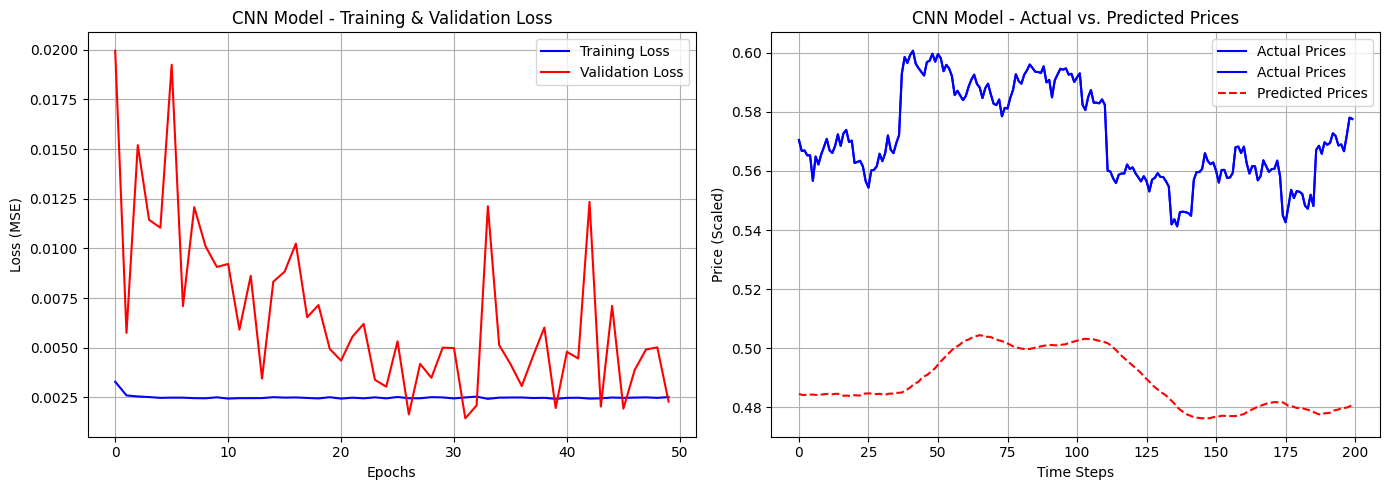

In [13]:
# Generating predictions
y_pred = model.predict(X_test)

plot_model_performance(history, y_test, y_pred, model_name="CNN Model")

#### GRU

In [6]:
import numpy as np

def create_sequences(data, target_column, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_column])
    return np.array(X), np.array(y)

# Define time steps
time_steps = 30  
X, y = create_sequences(df_sampled, target_column="Close_BTC", time_steps=time_steps)

# Train-test split (80% training, 20% testing)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

Training shape: (165568, 30, 11), (165568, 2)
Testing shape: (41393, 30, 11), (41393, 2)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, GRU
from keras.optimizers import Adam

# Hyperparameters
units = 50
output_size = 1
epochs = 50
batch_size = 16
learning_rate = 0.001

# Define model
model = Sequential()
model.add(GRU(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))

# Compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# Model summary
model.summary()

/Users/halladaykinsey/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         9,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,501 (37.11 KB)

 Trainable params: 9,501 (37.11 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

# Save model checkpoints
checkpoint = ModelCheckpoint("/Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5", 
                             monitor='val_loss', save_best_only=True, verbose=1)

# Log training history
csv_logger = CSVLogger("/Users/halladaykinsey/capstone-project/capstone-models/logs/gru_btcpred_combined_log.csv")

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

Epoch 1/50
10347/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 1: val_loss improved from inf to 0.00000, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 0.0025 - val_loss: 2.8620e-06
Epoch 2/50
10336/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1503e-04
Epoch 2: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 2.1502e-04 - val_loss: 4.1100e-06
Epoch 3/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0835e-04
Epoch 3: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 2.0834e-04 - val_loss: 7.1178e-05
Epoch 4/50
10343/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0189e-04
Epoch 4: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 2.0189e-04 - val_loss: 1.1207e-05
Epoch 5/50
10345/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9318e-04
Epoch 5: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 1.9318e-04 - val_loss: 1.9328e-05
Epoch 6/50
10346/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8972e-04
E

10348/10348 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 1.7812e-04 - val_loss: 2.8603e-06
Epoch 19/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7802e-04
Epoch 19: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7802e-04 - val_loss: 1.2634e-05
Epoch 20/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7482e-04
Epoch 20: val_loss improved from 0.00000 to 0.00000, saving model to /Users/halladaykinsey/capstone-project/capstone-models/models/gru_btcpred_combined_model.h5


10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7482e-04 - val_loss: 2.7350e-06
Epoch 21/50
10344/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7713e-04
Epoch 21: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7713e-04 - val_loss: 7.8588e-06
Epoch 22/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7841e-04
Epoch 22: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7841e-04 - val_loss: 3.7387e-06
Epoch 23/50
10340/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7931e-04
Epoch 23: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7930e-04 - val_loss: 7.7659e-06
Epoch 24/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7255e-04
Epoch 24: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7255e-04 - val_loss: 5.5761e-06
Epoch 25/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7231e-04 - val_loss: 2.5915e-06
Epoch 41/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7125e-04
Epoch 41: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7125e-04 - val_loss: 1.9812e-05
Epoch 42/50
10341/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7412e-04
Epoch 42: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7412e-04 - val_loss: 4.4129e-06
Epoch 43/50
10339/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7044e-04
Epoch 43: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7044e-04 - val_loss: 3.7472e-05
Epoch 44/50
10338/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7067e-04
Epoch 44: val_loss did not improve from 0.00000
10348/10348 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 1.7067e-04 - val_loss: 4.1496e-06
Epoch 45/50
10346/10348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

1294/1294 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


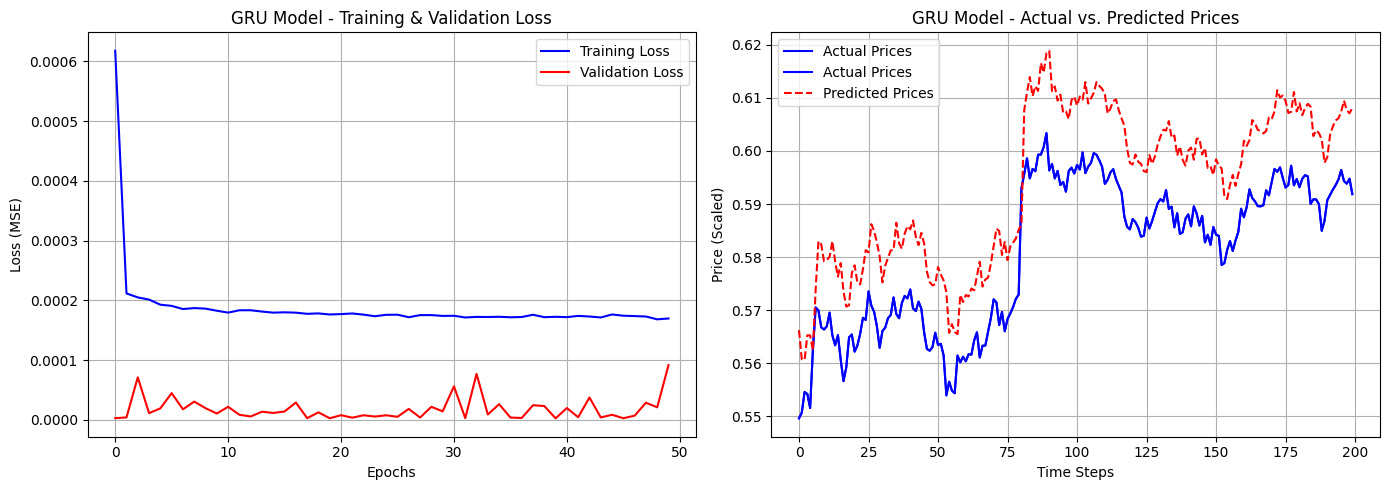

In [9]:
y_pred = model.predict(X_test)

plot_model_performance(history, y_test, y_pred, model_name="GRU Model")